In [1]:
# Initial imports
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
#Part 1: Prepare the Data
#Read myopia.csv into a Pandas DataFrame.
#Remove the "MYOPIC" column from the dataset.
#Note: The target column is needed for supervised machine learning, but it will make an unsupervised model biased. After all, the target column is effectively providing clusters already!
#Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.

In [3]:
# Loading data   --Read myopia.csv into a Pandas DataFrame.
df_myopia = pd.read_csv(Path("myopia.csv"))
df_myopia 

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [4]:
# drop unwanted columns  --Remove the "MYOPIC" column from the dataset.
myopia_data = df_myopia.drop(['MYOPIC'], axis=1)
myopia_data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
#Standardize your dataset  ---tandardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_myopia)

In [6]:
scaled_data

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         9.87137728e-01,  1.00324150e+00,  2.57480672e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
         9.87137728e-01,  1.00324150e+00, -3.88378667e-01],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -1.01302987e+00, -9.96768974e-01, -3.88378667e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
         9.87137728e-01,  1.00324150e+00, -3.88378667e-01],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.01302987e+00, -9.96768974e-01, -3.88378667e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
         9.87137728e-01,  1.00324150e+00, -3.88378667e-01]])

In [7]:
#Part 2: Apply Dimensionality Reduction
#Perform dimensionality reduction with PCA. How did the number of the features change?
#Hint: Rather than specify the number of principal components when you instantiate the PCA model, state the desired explained variance. For example, say that a dataset has 100 features. Using PCA(n_components=0.99) creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3. For this assignment, preserve 90% of the explained variance in dimensionality reduction.
#Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.
#Create a scatter plot of the t-SNE output. Are there distinct clusters?

In [8]:
# Perform dimensionality reduction with PCA at n_components=0.90
pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(scaled_data)

In [9]:
pca_transformed_data

array([[ 0.78227012,  0.89938285, -2.69739243, ...,  1.25900739,
         0.25617625,  1.83734811],
       [-0.61829974, -1.58621367, -0.63550601, ..., -0.81674293,
         0.68372566, -0.38664636],
       [-0.98659046, -0.65319681,  1.41033532, ...,  0.82672913,
        -0.0915031 ,  0.37060426],
       ...,
       [-0.91337537, -2.26245061,  0.69924086, ..., -1.38547766,
         0.81880064,  0.19702234],
       [-1.16102511,  0.46618323,  0.33658992, ...,  1.53095099,
         0.01810134, -1.09185289],
       [-0.71156701, -0.72395984, -0.09371775, ..., -0.64752756,
         0.12589922,  0.89660384]])

In [ ]:
#Explained variance is a statistical measure of how much variation in a dataset can be attributed to each of the principal components (eigenvectors) generated by a PCA.
#This is important because it allows us to rank the components in order of importance, and to focus on the most important ones when interpreting the results of our analysis.
#The larger the variance explained by a principal component, the more important that component is.

In [11]:
# pca_transformed_data variance to detect the importance of components. Principle component 1 and 2 
pca.explained_variance_ratio_

array([0.19869153, 0.14662762, 0.09951898, 0.07902771, 0.0710028 ,
       0.06555091, 0.06171931, 0.05989506, 0.05316865, 0.04913464,
       0.04465087])

In [12]:
# Run t-SNE
tsne = TSNE(learning_rate=50)
transformed_features = tsne.fit_transform(pca_transformed_data)

C:\Users\alisa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [13]:
# Check that dimensions have been reduced to two
transformed_features.shape

(618, 2)

In [14]:
myopia_data["X"] = transformed_features[:,0]
myopia_data["y"] = transformed_features[:,1]
myopia_data["Myopic"] = df_myopia["MYOPIC"]
myopia_data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,X,y,Myopic
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,-4.528125,-21.720989,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,-19.435545,-3.443867,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,14.774812,14.372757,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,-7.544570,-22.389711,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0.580258,-4.026330,0


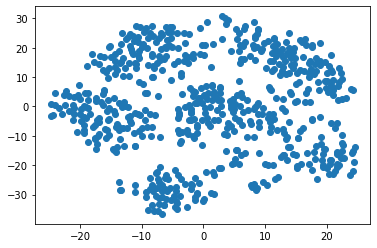

In [15]:
plt.scatter(myopia_data["X"], myopia_data["y"])
plt.show()

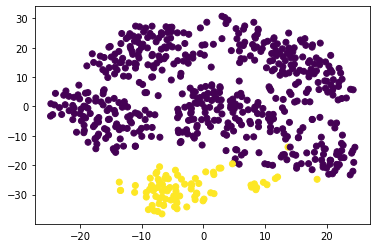

In [16]:
plt.scatter(myopia_data["X"], myopia_data["y"], c=myopia_data["Myopic"])
plt.show()

In [17]:
labels = myopia_data["Myopic"]
labels.value_counts()

0    537
1     81
Name: Myopic, dtype: int64

In [ ]:
#Part 3: Perform a Cluster Analysis with K-means
#Create an elbow plot to identify the best number of clusters. Make sure to do the following:
#Use a for loop to determine the inertia for each k between 1 through 10.
#If possible, determine where the elbow of the plot is, and at which value of k it appears.

In [18]:
df_myopia_pca = pd.DataFrame(data=pca_transformed_data, columns=["principal component 1", "principal component 2",
                                                                "principal component 3","principal component 4",
                                                                 "principal component 5","principal component 6",
                                                                 "principal component 7",
                                                                 "principal component 8","principal component 9",
                                                                 "principal component 10","principal component 11"])
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11
0,0.782270,0.899383,-2.697392,0.533307,-3.138869,-1.514275,2.665827,-0.685834,1.259007,0.256176,1.837348
1,-0.618300,-1.586214,-0.635506,-0.310405,0.562274,0.589375,0.675577,0.329263,-0.816743,0.683726,-0.386646
2,-0.986590,-0.653197,1.410335,0.671055,-0.100877,0.014845,-0.535527,0.124015,0.826729,-0.091503,0.370604
3,0.351714,0.943830,-2.517241,-1.389667,-2.240394,0.125941,0.395271,-1.507727,1.722338,0.097634,-0.416667
4,-0.401488,-2.792502,0.639103,0.680018,0.235568,-0.868260,0.320928,-1.447538,-0.335757,-0.383506,0.317567


In [19]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)



C:\Users\alisa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


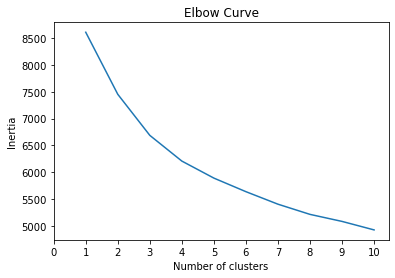

In [20]:
# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [21]:
df_elbow.head()

,k,inertia
0,1,8611.719398
1,2,7453.292155
2,3,6686.361671
3,4,6206.151491
4,5,5888.248458


In [22]:
def get_clusters(k, df_myopia_pca):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(df_myopia_pca)

    # Predict clusters
    predictions = model.predict(df_myopia_pca)

    # Create return DataFrame with predicted clusters
    df_myopia_pca["myopic"] = model.labels_

    return df_myopia_pca

In [23]:
clusters = get_clusters(2, df_myopia_pca)
clusters.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,myopic
0,0.782270,0.899383,-2.697392,0.533307,-3.138869,-1.514275,2.665827,-0.685834,1.259007,0.256176,1.837348,0
1,-0.618300,-1.586214,-0.635506,-0.310405,0.562274,0.589375,0.675577,0.329263,-0.816743,0.683726,-0.386646,1
2,-0.986590,-0.653197,1.410335,0.671055,-0.100877,0.014845,-0.535527,0.124015,0.826729,-0.091503,0.370604,1
3,0.351714,0.943830,-2.517241,-1.389667,-2.240394,0.125941,0.395271,-1.507727,1.722338,0.097634,-0.416667,0
4,-0.401488,-2.792502,0.639103,0.680018,0.235568,-0.868260,0.320928,-1.447538,-0.335757,-0.383506,0.317567,1


In [24]:
def show_clusters(df_myopia_pca):
    plt.scatter(df_myopia_pca['principal component 1'], df_myopia_pca['principal component 2'], 
                c=df_myopia_pca['myopic'])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

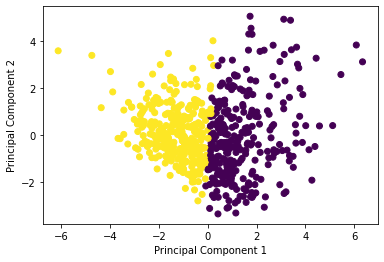

In [25]:
show_clusters(clusters)

In [ ]:
#Part 4: Make a Recommendation

In [ ]:
#Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. Can the patients be clustered?

#The data (sample) is inconclusive to determine if the patients can be clustered into whether the kids have or does not have myopic.
#There was 618 samples with 14 variables. After scaling the data and reducing the dimensions,
#the principle component was reduced to 618 sample with 2 components. If additional dimensions were added,
#the data would likely allow us to show definitive clusters to help determine whether our patients are myopic or not.


#If so, into how many clusters?
#Inconclusive